Universidade Tecnológica Federal do Paraná  
Professor: Wellington José Corrêa  
Orientando: Enzo Dornelles Italiano  
Cálculo Numérico

#Raízes de Equações

Nesta lista vamos determinar numéricamente as raízes da equação $f(x) = 0$ pelos métodos da bissecção, do ponto fixo, Newton-Raphson, secante e regula falsi. Para facilitar o uso ao aluno, usaremos alguns exemplos apresentados em sala.

Antes de iniciar é necessário executar uma vez o código do tópico **Códigos.** Lembre-se que às vezes, é conveniente clicar logo acima em *open in playground mode*, bem como salvar uma cópia em seu *Google Drive.*

## Códigos

In [ ]:
!pip install mpld3
!pip install "git+https://github.com/javadba/mpld3@display_fix"
import math
import matplotlib.pyplot as plt
from prettytable import PrettyTable
from sympy import *
import numpy as np
import mpld3
from mpld3 import plugins
x = symbols('x')
 
def plot2d(f, inicio, fim):
    z = np.arange(inicio,fim,0.1)
    
    y = []
    for i in range(len(z)):
        y.append(f.subs(x,z[i]))
    
    fig, ax = plt.subplots()
    ax.set(title='Gráfico função f(x)='+str(f))
    ax.plot(z,y)
    ax.grid()
    plt.show()
 
def bisseccao(f, e, a, b):
    fa = f.subs(x,a)
    fb = f.subs(x,b)
    if fa * fb >= 0:
        print("Não atende ao critério f(a) * f(b) < 0")
        return
    
    k = 0
    ak = []
    bk = []
    xk = []
    fak = []
    fbk = []
    xk = []
    fxk = []
    xk_x = []
    ak.append(a)
    bk.append(b)
 
    kf = math.log((b-a)/e,2)-1
    times = math.ceil(kf) + 1
 
    for k in range(times):
        if k == 0:
            y = ak[len(ak)-1]
            fak.append(round(f.subs(x,y),9))
            y = bk[len(bk)-1]
            fbk.append(round(f.subs(x,y),9))
            xk.append((ak[len(ak)-1] + bk[len(bk)-1])/2)
            y = xk[len(xk)-1]
            fxk.append(round(f.subs(x,y),9))
            xk_x.append('-')
        else:
            if (fak[len(fak)-1] < 0 and fxk[len(fxk)-1] < 0) or (fak[len(fak)-1] > 0 and fxk[len(fxk)-1] > 0):
                ak.append(xk[len(xk)-1])
                bk.append(bk[len(bk)-1])
            else:
                ak.append(ak[len(ak)-1])
                bk.append(xk[len(xk)-1])
 
            y = ak[len(ak)-1]
            fak.append(round(f.subs(x,y),9))
            y = bk[len(bk)-1]
            fbk.append(round(f.subs(x,y),9))
            xk.append((ak[len(ak)-1] + bk[len(bk)-1])/2)
            y = xk[len(xk)-1]
            fxk.append(round(f.subs(x,y),9))
            temp = xk[len(xk)-1] - xk[len(xk)-2]
            if temp < 0:
                temp = temp * -1
            xk_x.append(temp)
 
    Table = PrettyTable(["k", "a", "b", "f(a)", "f(b)", "x", "f(x)", "|x(k) - x(k-1)|"])
    for k in range(times):
        Table.add_row([k, ak[k], bk[k], fak[k], fbk[k], xk[k], fxk[k], xk_x[k]])
 
 
    print(Table)
    print("Donde \u03B5 é aproximadamente " + str(xk[len(xk)-1]))
 
def graficoBissec(f, e, a, b):
    k = 0
    ak = []
    bk = []
    xk = []
    fak = []
    fbk = []
    xk = []
    fxk = []
    xk_x = []
    ak.append(a)
    bk.append(b)
 
    kf = math.log((b-a)/e,2)-1
    times = math.ceil(kf) + 1
 
    for k in range(times):
        if k == 0:
            y = ak[len(ak)-1]
            fak.append(round(f.subs(x,y),9))
            y = bk[len(bk)-1]
            fbk.append(round(f.subs(x,y),9))
            xk.append((ak[len(ak)-1] + bk[len(bk)-1])/2)
            y = xk[len(xk)-1]
            fxk.append(round(f.subs(x,y),9))
            xk_x.append('-')
        else:
            if (fak[len(fak)-1] < 0 and fxk[len(fxk)-1] < 0) or (fak[len(fak)-1] > 0 and fxk[len(fxk)-1] > 0):
                ak.append(xk[len(xk)-1])
                bk.append(bk[len(bk)-1])
            else:
                ak.append(ak[len(ak)-1])
                bk.append(xk[len(xk)-1])
 
            y = ak[len(ak)-1]
            fak.append(round(f.subs(x,y),9))
            y = bk[len(bk)-1]
            fbk.append(round(f.subs(x,y),9))
            xk.append((ak[len(ak)-1] + bk[len(bk)-1])/2)
            y = xk[len(xk)-1]
            fxk.append(round(f.subs(x,y),9))
            temp = xk[len(xk)-1] - xk[len(xk)-2]
            if temp < 0:
                temp = temp * -1
            xk_x.append(temp)
 
    return xk,fxk
 
def pontoFixo(f,e,xi):
    xk = []
    xk.append(xi)
    xk_x = []
    xk_x.append("-")
    end_condition = 0
    while not end_condition:
        xk.append(f.subs(x,xk[len(xk)-1]))
        xk_x.append(abs(xk[len(xk)-1]-xk[len(xk)-2]))
        if xk_x[len(xk_x)-1] < e:
            end_condition = 1
    
    Table = PrettyTable(["k", "xk", "|x(k) - x(k-1)|"])
    for k in range(0, len(xk)):
        Table.add_row([k, xk[k], xk_x[k]])
    
    print(Table)
    print("Donde \u03B5 é aproximadamente " + str(xk[len(xk)-1]))
 
def graficoPontoFixo(f,e,a,b,xi):
    xk = []
    xk.append(xi)
    xk_x = []
    xk_x.append("-")
    end_condition = 0
    while not end_condition:
        xk.append(f.subs(x,xk[len(xk)-1]))
        xk_x.append(abs(xk[len(xk)-1]-xk[len(xk)-2]))
        if xk_x[len(xk_x)-1] < e:
            end_condition = 1
    return xk
 
def newton(f, e, a, b):
    xk = []
    xk.append(b)
    xk_x = []
    xk_x.append(0)
    end_condition = 0
 
    if f.subs(x,xk[len(xk)-1]) * diff(diff(f,x),x).subs(x,xk[len(xk)-1]) > 0:
        while not end_condition:
            func = f.subs(x,xk[len(xk)-1])
            derivate = diff(f,x).subs(x,xk[len(xk)-1])
            temp = xk[len(xk)-1] - func/derivate
            xk.append(N(temp))
 
            temp2 = xk[len(xk)-2] - xk[len(xk)-1]
            if temp2 < 0:
                temp2 = temp2 * -1
 
            xk_x.append(N(temp2))
            if xk_x[len(xk_x)-1] < e:
                end_condition = 1
            
        Table = PrettyTable(["k", "xk", "|x(k) - x(k-1)|"])
        for k in range(1, len(xk)):
            Table.add_row([k, xk[k], xk_x[k]])
        
        print(Table)
 
        print("Donde \u03B5 é aproximadamente " + str(xk[len(xk)-1]))
 
def graficoNewton(f, e, a, b):
    xk = []
    xk.append(b)
    xk_x = []
    xk_x.append(0)
    end_condition = 0
 
    if f.subs(x,xk[len(xk)-1]) * diff(diff(f,x),x).subs(x,xk[len(xk)-1]) > 0:
        while not end_condition:
            func = f.subs(x,xk[len(xk)-1])
            derivate = diff(f,x).subs(x,xk[len(xk)-1])
            temp = xk[len(xk)-1] - func/derivate
            xk.append(N(temp))
 
            temp2 = xk[len(xk)-2] - xk[len(xk)-1]
            if temp2 < 0:
                temp2 = temp2 * -1
 
            xk_x.append(N(temp2))
            if xk_x[len(xk_x)-1] < e:
                end_condition = 1
    return xk[1:]
 
def secante(f, e, a, b):
    if f.subs(x, a)*f.subs(x, b) > 0:
      print("O procedimento não foi bem sucedido pois f(a) e f(b) tem sinais iguais")
      print("f(a) =", f.subs(x,a))
      print("f(b) =", f.subs(x,b))
      return
    xk = []
    xk.append(a)
    xk.append(b)
    xk_x = []
    xk_x.append(0)
    xk_x.append(0)
    end_condition = 0
 
    while not end_condition:
        temp  = f.subs(x, xk[len(xk)-1]) * (xk[len(xk)-1] - xk[len(xk)-2])
        temp2 = f.subs(x, xk[len(xk)-1]) - f.subs(x,xk[len(xk)-2])
        temp3 = xk[len(xk)-1] - (temp/temp2)
        xk.append(temp3)
 
        temp4 = xk[len(xk)-1] - xk[len(xk)-2]
        
        if temp4 < 0:
            temp4 = temp4 * -1
 
        xk_x.append(temp4)
 
        if xk_x[len(xk_x)-1] < e:
            end_condition = 1
 
    Table = PrettyTable(["k", "xk", "|x(k+1) - x(k)|"])
    for k in range(2, len(xk)):
        Table.add_row([k, xk[k], xk_x[k]])
        
    print(Table)
    print("Donde \u03B5 é aproximadamente " + str(xk[len(xk)-1]))
 
def graficoSecante(f, e, a, b):
    if f.subs(x, a)*f.subs(x, b) > 0:
      print("O procedimento não foi bem sucedido pois f(a) e f(b) tem sinais iguais")
      print("f(a) =", f.subs(x,a))
      print("f(b) =", f.subs(x,b))
      return
    xk = []
    xk.append(a)
    xk.append(b)
    xk_x = []
    xk_x.append(0)
    xk_x.append(0)
    end_condition = 0
 
    while not end_condition:
        temp  = f.subs(x, xk[len(xk)-1]) * (xk[len(xk)-1] - xk[len(xk)-2])
        temp2 = f.subs(x, xk[len(xk)-1]) - f.subs(x,xk[len(xk)-2])
        temp3 = xk[len(xk)-1] - (temp/temp2)
        xk.append(temp3)
 
        temp4 = xk[len(xk)-1] - xk[len(xk)-2]
        
        if temp4 < 0:
            temp4 = temp4 * -1
 
        xk_x.append(temp4)
 
        if xk_x[len(xk_x)-1] < e:
            end_condition = 1
    return xk[2:]
 
def regulaFalsi(f, e, a, b):
    if f.subs(x, a)*f.subs(x, b) > 0:
      print("O procedimento não foi bem sucedido pois f(a) e f(b) tem sinais iguais")
      print("f(a) =", f.subs(x,a))
      print("f(b) =", f.subs(x,b))
      return
    xk = []
    xk_x = []
 
    x0 = a
    x1 = b
 
    end_condition = 0
 
    while not end_condition:
        temp = x1 - f.subs(x, x1) * (x1 - x0) / (f.subs(x, x1) - f.subs(x, x0))
 
        temp2 = temp - x1
        
        if temp2 < 0:
            temp2 = temp2 * -1
 
        if temp2 < e:
            xk.append(temp)
            xk_x.append(temp2)
            end_condition = 1
            continue
 
        k = f.subs(x, temp)
 
        if k*f.subs(x, x1) < 0:
            x0 = x1
 
        x1 = temp
        xk.append(temp)
        xk_x.append(temp2)
        
 
    Table = PrettyTable(["k", "xk", "|x(k) - x(k-1)|"])
    for k in range(len(xk)):
        Table.add_row([k+2, xk[k], xk_x[k]])
        
    print(Table)
    print("Donde \u03B5 é aproximadamente " + str(xk[len(xk)-1]))
 
def graficoRegulaFalsi(f, e, a, b):
    if f.subs(x, a)*f.subs(x, b) > 0:
      print("O procedimento não foi bem sucedido pois f(a) e f(b) tem sinais iguais")
      print("f(a) =", f.subs(x,a))
      print("f(b) =", f.subs(x,b))
      return
    
    xk = []
    xk_x = []
 
    x0 = a
    x1 = b
 
    end_condition = 0
 
    while not end_condition:
        temp = x1 - f.subs(x, x1) * (x1 - x0) / (f.subs(x, x1) - f.subs(x, x0))
 
        temp2 = temp - x1
        
        if temp2 < 0:
            temp2 = temp2 * -1
 
        if temp2 < e:
            xk.append(temp)
            xk_x.append(temp2)
            end_condition = 1
            continue
 
        k = f.subs(x, temp)
 
        if k*f.subs(x, x1) < 0:
            x0 = x1
 
        x1 = temp
        xk.append(temp)
        xk_x.append(temp2)
    return xk

     |████████████████████████████████| 890kB 3.2MB/s 
  Created wheel for mpld3: filename=mpld3-0.5.2-cp37-none-any.whl size=200644 sha256=fac8d9cb47e3800650d39bf7415e7a3b6e4e25153aab5f793354dd159cc6a362
  Stored in directory: /root/.cache/pip/wheels/21/73/06/ea4b85609301850b1289a282852d92e22fcbf7a250ed5f547f
Successfully built mpld3
  Cloning https://github.com/javadba/mpld3 (to revision display_fix) to /tmp/pip-req-build-cenxxptm
  Running command git clone -q https://github.com/javadba/mpld3 /tmp/pip-req-build-cenxxptm
  Running command git checkout -b display_fix --track origin/display_fix
  Switched to a new branch 'display_fix'
  Branch 'display_fix' set up to track remote branch 'display_fix' from 'origin'.
  Running command git submodule update --init --recursive -q
  Created wheel for mpld3: filename=mpld3-0.3.1.dev1-cp37-none-any.whl size=116984 sha256=700e4b91e8ed4ef05b0c4093bd90e6a43c4e7d958748dc3a079af3e88b65e5ef
  Stored in directory: /tmp/pip-ephem-wheel-cache-8de58ncx/

## 1. Método da Bissecção

De modo a empregar o método da bissecção, basta usar o procedimento bisseccao(f,epsilon,a,b).

Exemplo: Calcule a raiz positiva da equação  $f(x)=x^2−3$  com tolerância  $\varepsilon ≤0.01.$

In [ ]:
import math
def f(x): return x**2-3

Para a escolha adequada do intervalo [a,b], é conveniente plotar o gráfico de f recorrendo ao comando:

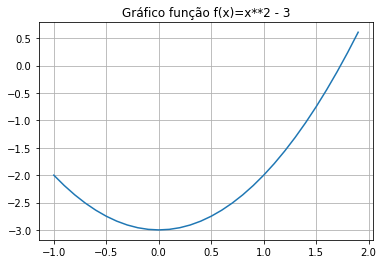

In [ ]:
plot2d(f(x), -1, 2)

Observando o gráfico acima, escolhamos os pontos $a=1$ e $b=2$, por exemplo. Logo,

In [ ]:
bisseccao(f(x), 0.01, 1, 2)

+---+---------+----------+--------------+-------------+-----------+--------------+-----------------+
| k |    a    |    b     |     f(a)     |     f(b)    |     x     |     f(x)     | |x(k) - x(k-1)| |
+---+---------+----------+--------------+-------------+-----------+--------------+-----------------+
| 0 |    1    |    2     |      -2      |      1      |    1.5    | -0.750000000 |        -        |
| 1 |   1.5   |    2     | -0.750000000 |      1      |    1.75   | 0.062500000  |       0.25      |
| 2 |   1.5   |   1.75   | -0.750000000 | 0.062500000 |   1.625   | -0.359375000 |      0.125      |
| 3 |  1.625  |   1.75   | -0.359375000 | 0.062500000 |   1.6875  | -0.152343750 |      0.0625     |
| 4 |  1.6875 |   1.75   | -0.152343750 | 0.062500000 |  1.71875  | -0.045898438 |     0.03125     |
| 5 | 1.71875 |   1.75   | -0.045898438 | 0.062500000 |  1.734375 | 0.008056641  |     0.015625    |
| 6 | 1.71875 | 1.734375 | -0.045898438 | 0.008056641 | 1.7265625 | -0.018981934 |    0.007

In [ ]:
newton(f(x), 0.001, .9, .96)

+---+-------------------+---------------------+
| k |         xk        |   |x(k) - x(k-1)|   |
+---+-------------------+---------------------+
| 1 | 0.953653296625298 | 0.00634670337470233 |
| 2 | 0.953613900950977 | 3.93956743207635e-5 |
+---+-------------------+---------------------+
Donde ε é aproximadamente 0.953613900950977


Agora, recorramos ao procedimento que nos dará o gráfico de $f(x)$ e das iterações obtidas pelo método da bissecção:

In [ ]:
result = graficoBissec(f(x), 0.01, 1, 2)
inicio = 1
fim = 2
z = np.arange(inicio,fim,0.001)
    
y = []
for i in range(len(z)):
    y.append(f(x).subs(x,z[i]))

fig, ax = plt.subplots()
ax.set(title='Gráfico função f(x)='+str(f(x)))
ax.plot(z,y, "-o", markersize=2)
plt.plot(result[0],result[1],'ro')
ax.grid()
plugins.connect(fig, plugins.MousePosition(fontsize=14))

mpld3.display()

Por outro lado, se tivéssemos escolhido $a=1$ e $b=1.5$, o procedimento acima nos devolveria a seguinte informação:

In [ ]:
def f(x): return pow(x,2)-3
bisseccao(f(x), 0.01, 1, 1.5)

Exemplo: Obtenha a raiz da equação $f(x) = x^2 + ln(x)$ com $\epsilon \leq 10^{-2}$.

Solução: Inicialmente, como feito no exemplo anterior, definamos f(x) e plotemos o gráfico. Em python a função log(x,base), quando não se passa o valor da base como parâmetro ela considera a base = $e$.

In [ ]:
def f(x): return pow(x,2) + ln(x)
plot2d(f(x), 0.2, 2)

Tendo em mente o gráfico acima, escolhamos por exemplo, $a=0.5$ e $b=1$,logo resulta do procedimento usado anteriormente.

In [ ]:
def f(x): return pow(x,2) + ln(x)
bisseccao(f(x), 0.01, 0.5, 1)

## 2. Método do Ponto Fixo

Neste método, devemos usar o procedimento pontoFixo(F,epsilon,x0) onde F é a função de iteração que satisfaz F(x) = x, e $x_0$ um ponto do interior de um intervalo [a,b].

Exemplo: Seja $f(x)=cos(x)-x$. Determine uma raiz de f(x) com tolerância $\epsilon \leq 10^{-2}$.

Solução: Primeiramente, é preciso definir a função f(x) pelo comando: 

In [ ]:
def f(x): return cos(x)-x

Como de praxe, plotamos o gráfico de f(x):

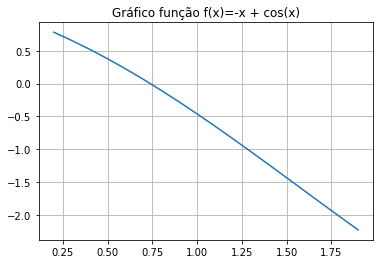

In [ ]:
plot2d(f(x), 0.2, 2)

Pelo gráfico, escolhamos $a=0.5,$ $b=1$ e $x_0=\frac{\pi}{4}$, por exemplo. Considere $F(x)=cos(x)$. Definindo-a e usando o procedimento para o ponto fixo descrito acima, note que:

In [ ]:
pontoFixo(f(x),10**(-2), math.pi/4)

+---+--------------------+---------------------+
| k |         xk         |   |x(k) - x(k-1)|   |
+---+--------------------+---------------------+
| 0 | 0.7853981633974483 |          -          |
| 1 | 0.707106781186548  |  0.0782913822109007 |
| 2 | 0.760244597075630  |  0.0531378158890825 |
| 3 | 0.724667480889126  |  0.0355771161865038 |
| 4 | 0.748719885789484  |  0.0240524049003581 |
| 5 | 0.732560844592242  |  0.0161590411972425 |
| 6 | 0.743464211315294  |  0.0109033667230518 |
| 7 | 0.736128256500852  | 0.00733595481444160 |
+---+--------------------+---------------------+
Donde ε é aproximadamente 0.736128256500852


Ademais, plotamos o gráfico de $f(x)$ com as iterações obtidas:

In [ ]:
result = graficoPontoFixo(f(x),10**(-2),0.5,1,math.pi/4)
inicio = 0.5
fim = 1
z = np.arange(inicio,fim,0.001)
    
y = []
w = []
for i in range(len(z)):
    y.append(f(x).subs(x,z[i]))
for i in range(len(result)):
    w.append(f(x).subs(x,result[i]))

fig, ax = plt.subplots()
ax.set(title='Gráfico função f(x)='+str(f(x)))
ax.plot(z,y, "-o", markersize=2)
plt.plot(result,w,'ro')
ax.grid()
plugins.connect(fig, plugins.MousePosition(fontsize=14))

mpld3.display()

## 2. Método de Newton

Para este método, usaremos o procedimento Newton(f,epsilon,a,b).

Exemplo: usando o método de Newton, obtenha a raiz positiva da equação $x^2-2=0$ com $\epsilon \leq 10^{-5}$.

Solução: Inicialmente, observe que neste exemplo, obteremos uma aproximação para raiz quadrada de 2 com precisão de quatro casas decimais. De fato, definamos $f(x)=x^2-2$ e plotamos seu gráfico:

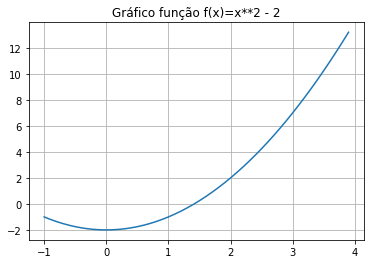

In [ ]:
def f(x): return x**2-2
plot2d(f(x), -1, 4)

Pelo gráfico, sejam $a=1$ e $b=2$. Assim,

In [ ]:

newton(f(x), 1e-5, 1, 2)

+---+------------------+---------------------+
| k |        xk        |   |x(k) - x(k-1)|   |
+---+------------------+---------------------+
| 1 | 1.50000000000000 |  0.500000000000000  |
| 2 | 1.41666666666667 |  0.0833333333333333 |
| 3 | 1.41421568627451 | 0.00245098039215685 |
| 4 | 1.41421356237469 | 2.12389982001682e-6 |
+---+------------------+---------------------+
Donde ε é aproximadamente 1.41421356237469


Podemos plotar o gráfico de $f(x)$ com as iterações obtidas por meio do comando: graficoNewton(f,e,a,b)

In [ ]:
result = graficoNewton(f(x), 0.00001, 1.0, 2)
inicio = 1
fim = 2
z = np.arange(inicio,fim,0.001)
    
y = []
w = []
for i in range(len(z)):
    y.append(f(x).subs(x,z[i]))
for i in range(len(result)):
    w.append(f(x).subs(x,result[i]))

fig, ax = plt.subplots()
ax.set(title='Gráfico função f(x)='+str(f(x)))
ax.plot(z,y, "-o", markersize=2)
plt.plot(result, w,'ro')
ax.grid()
plugins.connect(fig, plugins.MousePosition(fontsize=14))

mpld3.display()

Exemplo: Usando o método de Newton, obtenha uma aproximação para a solução da equação $f(x)=cos(x)-x$ com $\epsilon \leq 10^{-2}$.


Solução: De antemão, definamos $f(x)$

In [ ]:
def f(x): return 4*sin(x) - 3*x

Como feito em outros métodos, vamos plotar o gráfico de $f(x)$ para determinar os valores de $a$ e $b$:

In [ ]:
plot2d(f(x), 0, 2)

Pelo gráfico, podemos escolher $a=0.5$, $b=1$. Sendo assim, executando o código apresentado no início desta seção, resulta que 

In [ ]:
 
newton(f(x), 10**(-5), 1, 1.3)

O gráfico de $f(x)$ com as iterações é dado a seguir:

In [ ]:
result = graficoNewton(f(x), 10**(-2), 0.5, 1)
inicio = 0.5
fim = 1
z = np.arange(inicio,fim,0.001)
    
y = []
w = []
for i in range(len(z)):
    y.append(f(x).subs(x,z[i]))
for i in range(len(result)):
    w.append(f(x).subs(x,result[i]))

fig, ax = plt.subplots()
ax.set(title='Gráfico função f(x)='+str(f(x)))
ax.plot(z,y, "-o", markersize=2)
plt.plot(result, w,'ro')
ax.grid()
plugins.connect(fig, plugins.MousePosition(fontsize=14))

mpld3.display()

## 3. Método da Secante

Nesta seção, o procedimento a ser usado é secante(f,epsilon,a,b).

Exemplo: Utilize o método da secante para encontrar uma solução de $f(x)=cos(x) - x$ com $\epsilon \leq 10^{-5}$.

Solução: Como visto anteriormente, podemos considerar os mesmos valores de $a$ e $b,$ a saber, $a=0.5$, $b=1$. Logo,

In [ ]:
print(f(1.5))

0.544916280070002


In [ ]:
import math
def f(x): return cos(x)-x
secante(f(x), 10**(-5), .5, 1.0)

+---+-------------------+----------------------+
| k |         xk        |   |x(k+1) - x(k)|    |
+---+-------------------+----------------------+
| 2 | 0.725481587063930 |  0.274518412936070   |
| 3 | 0.738398620137094 |  0.0129170330731641  |
| 4 | 0.739087210820866 | 0.000688590683772361 |
| 5 | 0.739085132900112 | 2.07792075390678e-6  |
+---+-------------------+----------------------+
Donde ε é aproximadamente 0.739085132900112


Agora, recorramos ao procedimento que nos dará o gráfico de $f(x)$ e das iterações obtidas pelo método da secante:

In [ ]:
result = graficoSecante(f(x), 10**(-5), 0.5, 1.0)
inicio = 0.0
fim = 1.5
z = np.arange(inicio,fim,0.001)
    
y = []
w = []
for i in range(len(z)):
    y.append(f(x).subs(x,z[i]))
for i in range(len(result)):
    w.append(f(x).subs(x,result[i]))

fig, ax = plt.subplots()
ax.set(title='Gráfico função f(x)='+str(f(x)))
ax.plot(z,y, "-o", markersize=2)
plt.plot(result, w,'ro')
ax.grid()
plugins.connect(fig, plugins.MousePosition(fontsize=14))

mpld3.display()

Exemplo: Determine uma raiz de $f(x)=x^3-4x^2+x+6$ com $\epsilon \leq 10^{-2}$.

Solução: Definamos f e plotamos seu gráfico:

In [ ]:
def f(x): return x**3 - 4*x**2 + x + 6
plot2d(f(x), 0, 3)

Pelo gráfico, escolhamos por exemplo, $x_0=1.4$ e $x_1=2.2$. Logo,

In [ ]:
def f(x): return x**3-4*x**2+x+6
secante(f(x), 10**-2, 1.4, 2.2)

Como de praxe em cada exemplo, vamos plotar o gráfico das iterações com a função $f(x)$:

In [ ]:
result = graficoSecante(f(x), 10**(-2), 1.4, 2.2)
inicio = 1.4
fim = 2.2
z = np.arange(inicio,fim,0.001)
    
y = []
w = []
for i in range(len(z)):
    y.append(f(x).subs(x,z[i]))
for i in range(len(result)):
    w.append(f(x).subs(x,result[i]))

fig, ax = plt.subplots()
ax.set(title='Gráfico função f(x)='+str(f(x)))
ax.plot(z,y, "-o", markersize=2)
plt.plot(result, w,'ro')
ax.grid()
plugins.connect(fig, plugins.MousePosition(fontsize=14))

mpld3.display()

## 4. Método da Falsa Posição (Regula Falsi)

O procedimento a ser usado é regulaFalsi(f,epsilon,a,b).

Exemplo: Utilize o método Regula Falsi para encontrar uma solução de $x=cos(x)$ com $\epsilon \leq 10^{-5}$.

Solução: Sabemos dos exemplos anteriores que podemos considerar $a=0.5$, $b=1$. Deste modo,

In [ ]:
def f(x): return cos(x)-x
regulaFalsi(f(x), 0.00001, 0.5, 1)

Finalmente, plotando o gráfico de $f(x)$ contendo as iterações obtidas, temos:

In [ ]:
result = graficoRegulaFalsi(f(x), 0.00001, 0.5, 1.0)
inicio = 0.5
fim = 1
z = np.arange(inicio,fim,0.001)
print(result[0])
y = []
w = []
for i in range(len(z)):
    y.append(f(x).subs(x,z[i]))
for i in range(len(result)):
    w.append(f(x).subs(x,result[i]))

fig, ax = plt.subplots()
ax.set(title='Gráfico função f(x)='+str(f(x)))
ax.plot(z,y, "-o", markersize=2)
plt.plot(result, w,'ro')
ax.grid()
plugins.connect(fig, plugins.MousePosition(fontsize=14))

mpld3.display()